# Practice Lab: Advice for Applying Machine Learning
# Mariah Noelle Cornelio
# **UTA ID:** 1002053287
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

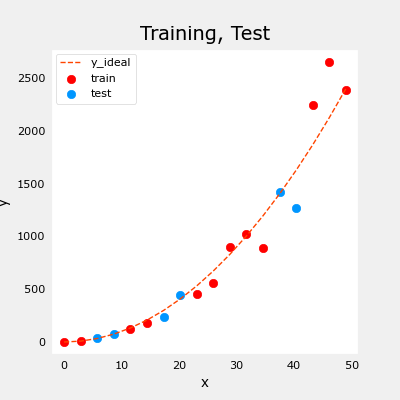

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [4]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
        formula=((yhat[i]-y[i])**2)
        err+=formula
    err=err/(2*m) # Divide by 2m if using gradient descent
    ### END CODE HERE ### 
    
    return(err)

In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

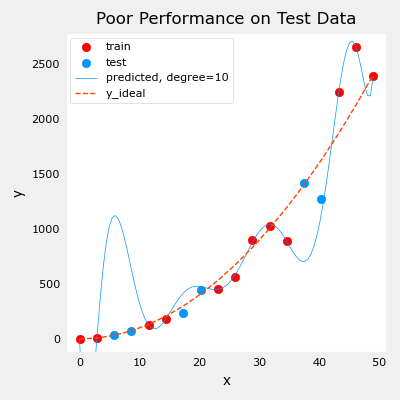

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

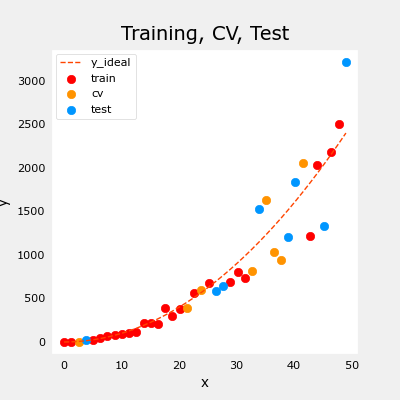

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

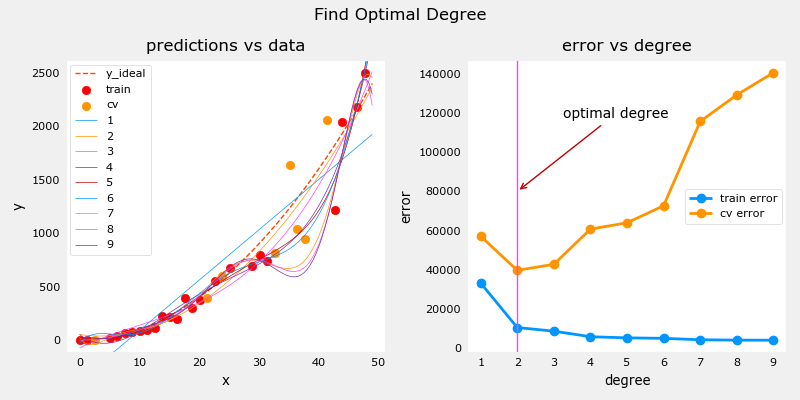

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

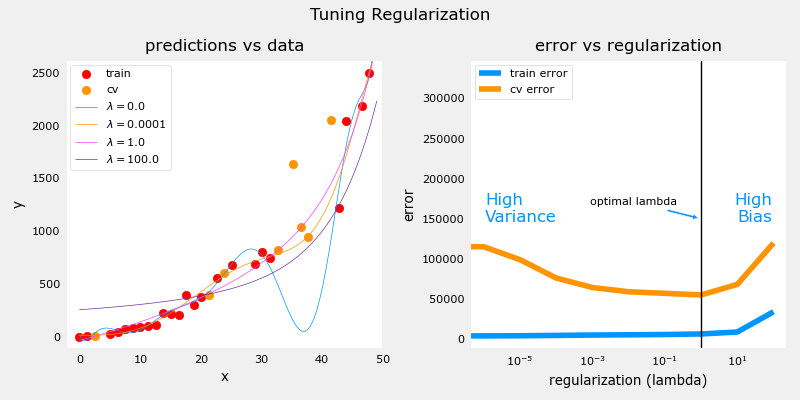

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

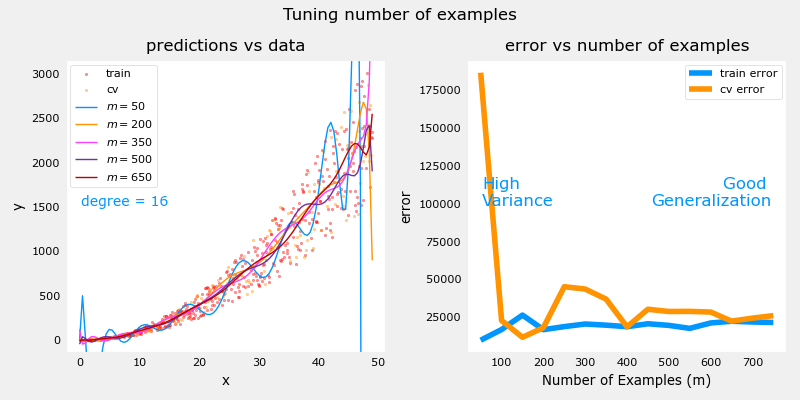

In [15]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [16]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


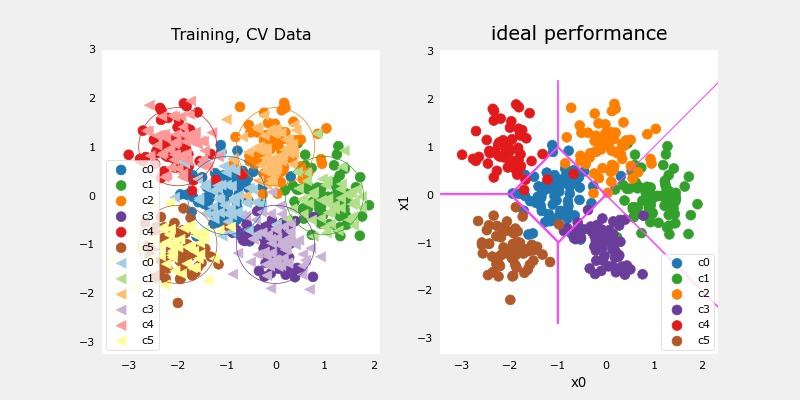

In [17]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [18]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m): # This is similar to the summation in the formula
    ### START CODE HERE ### 
        if yhat[i] != y[i]:
            incorrect+=1
    cerr=incorrect/m   
    ### END CODE HERE ### 
    
    return(cerr)

In [19]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [ ]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
  
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=None,
    optimizer=None,
    ### END CODE HERE ### 
)

In [ ]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

In [ ]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

In [ ]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [ ]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [29]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(6, activation="relu", name="L1"),
        Dense(6, activation="linear", name="L2"),
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### START CODE HERE ### 
)


In [30]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 1.9018
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.5808
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1.3600
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.1521
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.9561
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.7911
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.6646
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.5717
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.5046
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.4546
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.4150
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.3818
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.3547
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.3334
Epoch 15/1000
13/13 ━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.1799
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1798
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.1797
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.1795
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.1794
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.1793
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.1792
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.1790
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.1790
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.1789
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.1788
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.1787
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1787
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.1786
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.1768
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.1768
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.1768
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.1768
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.1767
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.1768
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.1767
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.1767
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.1767
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.1767
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.1767
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.1766
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.1767
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.1767
Epoch 171/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.1764
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.1764
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.1764
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.1764
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.1764
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.1764
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.1764
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.1764
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.1764
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.1763
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.1764
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.1763
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.1764
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.1764
Epoch 249/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1756
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.1756
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.1755
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.1756
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1755
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.1755
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.1755
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.1755
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1755
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.1755
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.1755
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.1755
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.1755
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.1755
Epoch 327/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.1750
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.1749
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.1749
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1749
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.1749
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.1747
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.1748
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.1749
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.1748
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.1748
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.1748
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.1749
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.1747
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.1748
Epoch 405/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.1742
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.1742
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.1742
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1742
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.1742
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.1742
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.1742
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1741
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.1742
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.1742
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.1742
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.1741
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.1741
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.1742
Epoch 483/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.1730
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.1728
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.1726
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1727
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.1728
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.1726
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1725
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.1728
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1727
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.1727
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1728
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.1725
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1726
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.1728
Epoch 561/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.1727
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.1725
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.1726
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.1723
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.1719
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.1722
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.1724
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1726
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.1725
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1726
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.1724
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.1718
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.1721
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.1724
Epoch 639/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.1720
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.1721
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1720
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.1721
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.1720
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.1721
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.1719
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.1720
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.1720
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.1719
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.1720
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.1721
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.1718
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1720
Epoch 717/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.1716
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.1717
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1718
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.1716
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.1716
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.1716
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.1715
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.1718
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.1717
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.1716
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.1717
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.1716
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.1716
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.1715
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.1712
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.1711
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.1713
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.1714
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.1714
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1714
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.1713
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.1713
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.1713
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.1713
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.1712
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1710
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.1714
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.1715
Epoch 873/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.1710
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.1710
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.1712
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.1710
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.1708
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.1710
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.1708
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 0.1710
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.1711
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.1712
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.1711
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.1711
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.1710
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.1711
Epoch 951/1000
13/13 

In [31]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182 (1.42 KB)

 Trainable params: 60 (480.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122 (976.00 B)

ValueError: The layer Simple has never been called and thus has no defined input.

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step


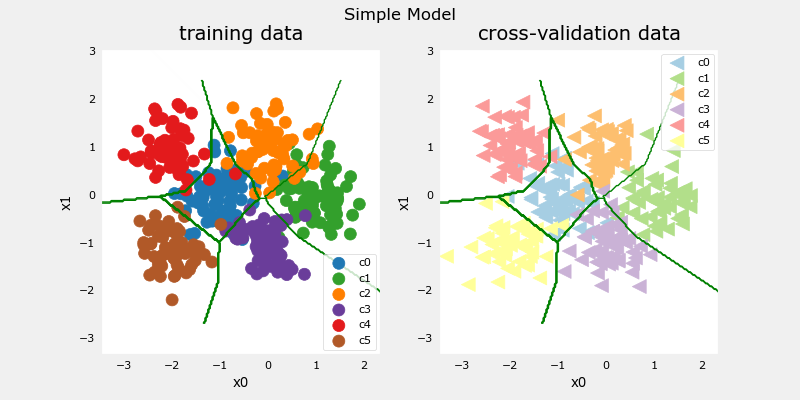

In [32]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [54]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
categorization error, training, simple model, 0.075, complex model: 0.010
categorization error, cv,       simple model, 0.062, complex model: 0.103


In [35]:
# This will print for simple because we have a model_s design already - let's make model c next
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))

print(f"categorization error, training, simple model: {training_cerr_simple:0.3f}")
print(f"categorization error, cv, simple model: {cv_cerr_simple:0.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
categorization error, training, simple model: 0.075
categorization error, cv, simple model: 0.062


In [50]:
# Making my complex model
tf.random.set_seed(1234)
model_c = Sequential(
    [
        Dense(120, activation="relu", name="L1"),
        Dense(40, activation="relu", name="L2"),
        Dense(6, activation="linear", name="L3")
    ], name="Complex"
)

model_c.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

In [51]:
model_c.fit(X_train, y_train, epochs=1000)
model_predict_c = lambda Xl: np.argmax(tf.nn.softmax(model_c.predict(Xl)).numpy(), axis=1)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 1.3096
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.4168
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.3470
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.2867
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.2332
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.2158
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.2090
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.2064
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1998
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.1934
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.1902
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.1922
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.1882
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.1860
Epoch 15/1000
13/13 ━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.1260
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.1194
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.1256
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.1166
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.1224
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.1243
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.1139
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.1254
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.1176
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.1128
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.1251
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.1120
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.1229
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.1203
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.1054
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.1142
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.1186
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.1052
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.1068
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.0995
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.0821
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.0844
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.0896
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.0808
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0883
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.0870
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.0957
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0995
Epoch 171/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.1077
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.1130
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.1471
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.1056
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.1210
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.1331
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.1447
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.1649
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.1226
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.1536
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.1351
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0961
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.0930
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0774
Epoch 249/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.0684
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0638
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0704
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.0617
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0624
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.0624
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.0625
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.0845
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0734
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.0908
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.0668
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.0707
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.0661
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0781
Epoch 327/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.1040
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.0682
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0772
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.0851
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.0917
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.0638
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0504
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.0558
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.0796
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.1178
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.0589
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0925
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.0595
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.0646
Epoch 405/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0365
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0389
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0354
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.0445
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.0354
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.0373
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.0506
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0444
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0365
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.0443
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.0399
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.0708
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0649
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.0678
Epoch 483/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.0530
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.0394
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.0435
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.0532
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.0418
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0529
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.0351
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.0447
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.0398
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.0485
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0360
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.0457
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0389
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.0512
Epoch 561/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.0499
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.0325
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.0323
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.0311
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.0320
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.0273
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0351
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.0271
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.0322
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0278
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0502
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0270
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0306
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.0321
Epoch 639/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.0243
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.0239
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0215
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.0228
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0214
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.0257
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0215
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.0285
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.0264
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.0368
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.0265
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.0277
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.0285
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0269
Epoch 717/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0208
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0288
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.0753
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0603
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.1146
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.0509
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.2453
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.0850
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.0401
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.0586
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0663
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.0451
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.0522
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.0550
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0176
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.0148
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.0182
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0143
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0202
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.0178
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.0180
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.0161
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0164
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0126
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.0146
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.0112
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0180
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.0156
Epoch 873/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.0341
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.0291
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.0266
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.0258
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.0232
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0267
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0238
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.0221
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.0213
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.0223
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.0211
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.0251
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.0229
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.0222
Epoch 951/1000
13/13 

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step


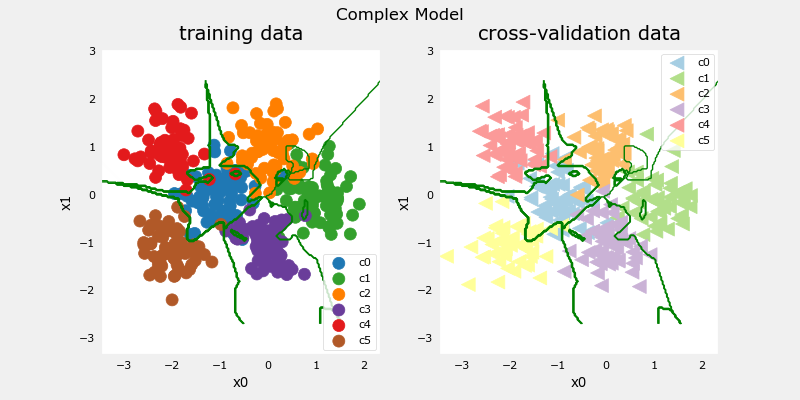

In [52]:
plt_nn(model_predict_c, X_train, y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [53]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))

training_cerr_complex = eval_cat_err(y_train, model_predict_c(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict_c(X_cv))

print(f"Categorization error, training, simple model: {training_cerr_simple:0.3f}")
print(f"Categorization error, cv, simple model: {cv_cerr_simple:0.3f}")
print(f"Categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"Categorization error, cv, complex model: {cv_cerr_complex:0.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
Categorization error, training, simple model: 0.075
Categorization error, cv, simple model: 0.062
Categorization error, training, complex model: 0.010
Categorization error, cv, complex model: 0.103


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [58]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"),
        Dense(40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),
        Dense(6, activation="linear", name="L3")
        ### START CODE HERE ### 
    ], name="ComplexRegularized"
)
model_r.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### START CODE HERE ### 
)

In [59]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 5.7656
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 1.7092
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 1.3446
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.1111
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 1.0029
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.9496
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.8968
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.8610
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.8348
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.8094
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.7816
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.7635
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.7510
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.7379
Epoch 15/1000
13/13 ━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.4631
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.4613
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.4603
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.4588
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.4575
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.4561
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.4552
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.4542
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.4531
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.4514
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.4504
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.4492
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.4485
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.4471
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.4541
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.4535
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.4533
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.4523
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.4525
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.4514
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.4509
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.4500
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.4489
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.4484
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.4473
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.4463
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.4454
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.4438
Epoch 171/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.3962
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3955
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.3952
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.3950
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.3944
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.3943
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.3937
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.3933
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.3930
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.3928
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.3927
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.3923
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.3922
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.3919
Epoch 249/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.3750
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.3748
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3745
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3743
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.3741
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.3738
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.3736
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.3733
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.3731
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.3729
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.3727
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3724
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.3722
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.3720
Epoch 327/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.3600
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.3596
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.3597
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3594
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.3592
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.3591
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3592
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.3594
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.3589
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.3588
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.3589
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3584
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.3579
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.3580
Epoch 405/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.3496
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.3497
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.3499
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3495
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.3495
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.3497
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.3492
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.3491
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.3492
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.3489
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.3484
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3484
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3483
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.3483
Epoch 483/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.3393
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.3400
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3407
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.3414
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.3416
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.3416
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.3417
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.3412
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3412
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.3415
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.3412
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3411
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3413
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.3410
Epoch 561/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.3354
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.3355
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3353
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3352
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.3354
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.3361
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.3253
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3393
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3421
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3423
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3390
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.3351
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.3334
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3327
Epoch 639/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.3397
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.3331
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3306
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.3295
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3294
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3294
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.3300
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.3267
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3263
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.3349
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3412
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.3383
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.3363
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.3311
Epoch 717/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.3239
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3247
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.3257
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.3257
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3259
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.3262
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.3258
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.3231
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.3330
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3336
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3392
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.3348
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.3300
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.3248
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.3226
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3201
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.3214
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.3249
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.3362
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.3400
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.3331
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.3277
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3222
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.3198
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.3195
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.3211
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3220
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3221
Epoch 873/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.3189
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.3171
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3178
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3189
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.3199
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3200
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.3198
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.3200
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.3210
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.3077
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3211
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.3257
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3299
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.3380
Epoch 951/1000
13/13 

In [60]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "ComplexRegularized"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 120)            │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 6)              │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,340 (127.66 KB)

 Trainable params: 5,446 (42.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,894 (85.11 KB)

ddd


ValueError: The layer ComplexRegularized has never been called and thus has no defined input.

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step


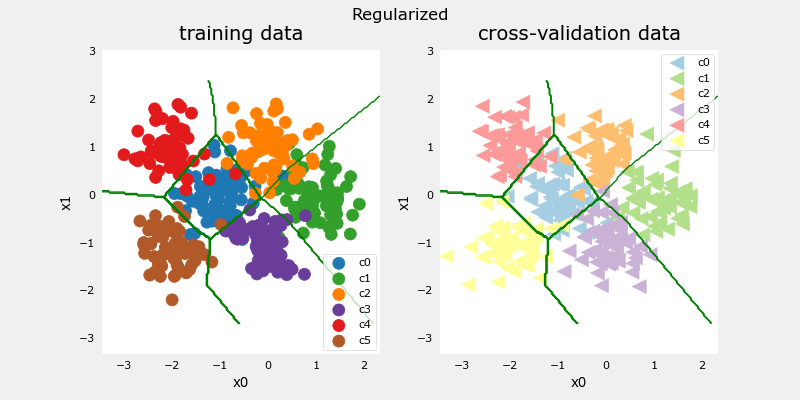

In [61]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [62]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
categorization error, training, regularized: 0.072, simple model, 0.075, complex model: 0.010
categorization error, cv,       regularized: 0.066, simple model, 0.062, complex model: 0.103


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [63]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 1.2765
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.3999
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.3441
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.2627
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.2230
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.2157
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.2070
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.2035
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1989
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.1975
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1952
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1931
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.1928
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.1899
Epoch 15/1000
13/13 ━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.1517
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1631
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1603
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.1483
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.1534
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1649
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.1611
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.1372
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.1571
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.1454
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1496
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.1768
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.1404
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.1483
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.1207
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.1299
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.1132
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.1226
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.1106
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.1139
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.1048
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.1006
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.1040
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.1047
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.1195
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.0994
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.1427
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.1368
Epoch 171/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.0949
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.1296
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.0945
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.0940
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.1039
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.1018
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.0912
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.1080
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.0864
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.0748
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.1197
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.0938
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.1153
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.0960
Epoch 249/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0768
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0936
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0658
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0729
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.0730
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.0848
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.0616
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.0832
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.0666
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0971
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0609
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0843
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0600
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.0936
Epoch 327/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.1150
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.1134
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.1143
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.1077
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0821
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.0809
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.1105
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.0858
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.0824
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.0654
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0766
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0611
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0620
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0655
Epoch 405/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0611
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.0597
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0506
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0549
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0619
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0794
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0761
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0665
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0594
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0687
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0681
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.0548
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.0852
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.0598
Epoch 483/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.0645
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0522
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.0610
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0525
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0725
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0501
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0563
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.0506
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0603
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.0587
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.0694
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0531
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.0589
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0586
Epoch 561/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0366
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.0369
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.0353
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.0390
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.0353
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.0396
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0370
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.0392
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.0364
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0407
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0365
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0394
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.0385
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0398
Epoch 639/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0442
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.0407
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.0420
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.0419
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0434
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.0384
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.0390
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.0384
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.0339
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0401
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0345
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.0367
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.0341
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.0356
Epoch 717/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0257
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0326
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0351
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0280
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.0315
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.0340
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.0254
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0250
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0279
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.0262
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0219
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0291
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.0262
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.0228
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.0312
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.0274
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.0289
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.0324
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.0328
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0776
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0722
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0670
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0728
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.0561
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.0763
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0789
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0482
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.0528
Epoch 873/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.1427
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.1833
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.0815
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.0841
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.1343
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.1257
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.0629
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.0703
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.1481
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.0903
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0928
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.0614
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.0576
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.0721
Epoch 951/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.2504
Epoch 16/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.2470
Epoch 17/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.2460
Epoch 18/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.2451
Epoch 19/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.2424
Epoch 20/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.2411
Epoch 21/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.2417
Epoch 22/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.2376
Epoch 23/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2384
Epoch 24/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.2366
Epoch 25/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2368
Epoch 26/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2344
Epoch 27/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.2342
Epoch 28/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.2344
Epoch 29/1000
13/13 ━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.2111
Epoch 94/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.2108
Epoch 95/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.2019
Epoch 96/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2153
Epoch 97/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.2053
Epoch 98/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.2112
Epoch 99/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.2128
Epoch 100/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.2030
Epoch 101/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.2095
Epoch 102/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.2050
Epoch 103/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.2057
Epoch 104/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.2086
Epoch 105/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2027
Epoch 106/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.2067
Epoch 107/1000
13/13 ━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.1964
Epoch 172/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.1874
Epoch 173/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1973
Epoch 174/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.1899
Epoch 175/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.1939
Epoch 176/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.1974
Epoch 177/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1916
Epoch 178/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.1909
Epoch 179/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1970
Epoch 180/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.1872
Epoch 181/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.1962
Epoch 182/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1913
Epoch 183/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.1869
Epoch 184/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.1941
Epoch 185/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.1758
Epoch 250/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.1854
Epoch 251/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.1750
Epoch 252/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.1883
Epoch 253/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.1738
Epoch 254/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.1896
Epoch 255/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.1761
Epoch 256/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.1841
Epoch 257/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.1791
Epoch 258/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.1793
Epoch 259/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.1782
Epoch 260/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.1769
Epoch 261/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1779
Epoch 262/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.1748
Epoch 263/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1834
Epoch 328/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.1661
Epoch 329/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.1867
Epoch 330/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1639
Epoch 331/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1810
Epoch 332/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.1655
Epoch 333/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.1746
Epoch 334/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.1622
Epoch 335/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.1715
Epoch 336/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.1617
Epoch 337/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1689
Epoch 338/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.1688
Epoch 339/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.1613
Epoch 340/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.1854
Epoch 341/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.1543
Epoch 406/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.1802
Epoch 407/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.1589
Epoch 408/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.1773
Epoch 409/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.1618
Epoch 410/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1610
Epoch 411/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.1728
Epoch 412/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.1596
Epoch 413/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.1783
Epoch 414/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.1643
Epoch 415/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.1633
Epoch 416/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.1698
Epoch 417/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.1572
Epoch 418/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.1750
Epoch 419/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.1649
Epoch 484/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.1700
Epoch 485/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.1541
Epoch 486/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.1627
Epoch 487/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.1604
Epoch 488/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.1629
Epoch 489/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1544
Epoch 490/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1528
Epoch 491/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.1540
Epoch 492/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.1549
Epoch 493/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.1520
Epoch 494/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.1568
Epoch 495/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.1522
Epoch 496/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.1596
Epoch 497/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.1575
Epoch 562/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.1538
Epoch 563/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.1475
Epoch 564/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.1626
Epoch 565/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.1482
Epoch 566/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1625
Epoch 567/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.1486
Epoch 568/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.1546
Epoch 569/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.1557
Epoch 570/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.1513
Epoch 571/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1674
Epoch 572/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1542
Epoch 573/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1605
Epoch 574/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.1565
Epoch 575/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.1686
Epoch 640/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.1558
Epoch 641/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.1530
Epoch 642/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.1470
Epoch 643/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.1569
Epoch 644/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.1465
Epoch 645/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.1539
Epoch 646/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.1484
Epoch 647/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1557
Epoch 648/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.1464
Epoch 649/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.1677
Epoch 650/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.1514
Epoch 651/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.1687
Epoch 652/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.1488
Epoch 653/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.1422
Epoch 718/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.1444
Epoch 719/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.1453
Epoch 720/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.1478
Epoch 721/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.1441
Epoch 722/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1489
Epoch 723/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.1442
Epoch 724/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.1517
Epoch 725/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.1433
Epoch 726/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.1427
Epoch 727/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1506
Epoch 728/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.1448
Epoch 729/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.1494
Epoch 730/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.1461
Epoch 731/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.1472
Epoch 796/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.1495
Epoch 797/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.1450
Epoch 798/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1380
Epoch 799/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.1468
Epoch 800/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.1483
Epoch 801/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.1466
Epoch 802/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.1472
Epoch 803/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.1450
Epoch 804/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.1414
Epoch 805/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.1397
Epoch 806/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1459
Epoch 807/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.1465
Epoch 808/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.1402
Epoch 809/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.1452
Epoch 874/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.1387
Epoch 875/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.1478
Epoch 876/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1428
Epoch 877/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.1425
Epoch 878/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.1461
Epoch 879/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.1415
Epoch 880/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.1418
Epoch 881/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.1420
Epoch 882/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.1400
Epoch 883/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.1455
Epoch 884/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.1378
Epoch 885/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.1386
Epoch 886/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.1405
Epoch 887/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.1375
Epoch 952/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.1433
Epoch 953/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.1502
Epoch 954/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.1366
Epoch 955/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.1458
Epoch 956/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.1433
Epoch 957/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.1372
Epoch 958/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1541
Epoch 959/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.1367
Epoch 960/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.1578
Epoch 961/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.1373
Epoch 962/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.1437
Epoch 963/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1310
Epoch 964/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.1490
Epoch 965/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.3514
Epoch 30/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.3493
Epoch 31/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.3518
Epoch 32/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.3465
Epoch 33/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.3442
Epoch 34/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3427
Epoch 35/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.3403
Epoch 36/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3372
Epoch 37/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.3322
Epoch 38/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.3330
Epoch 39/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3320
Epoch 40/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.3316
Epoch 41/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3328
Epoch 42/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.3279
Epoch 43/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.2722
Epoch 108/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.2747
Epoch 109/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.2748
Epoch 110/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.2742
Epoch 111/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.2718
Epoch 112/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.2756
Epoch 113/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.2717
Epoch 114/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.2735
Epoch 115/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2742
Epoch 116/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.2734
Epoch 117/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.2722
Epoch 118/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.2744
Epoch 119/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.2682
Epoch 120/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.2711
Epoch 121/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.2547
Epoch 186/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.2533
Epoch 187/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.2547
Epoch 188/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.2505
Epoch 189/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.2547
Epoch 190/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.2545
Epoch 191/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.2522
Epoch 192/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.2556
Epoch 193/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.2538
Epoch 194/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.2517
Epoch 195/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.2538
Epoch 196/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.2526
Epoch 197/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.2518
Epoch 198/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.2526
Epoch 199/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.2427
Epoch 264/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.2437
Epoch 265/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.2413
Epoch 266/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.2418
Epoch 267/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.2417
Epoch 268/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.2439
Epoch 269/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.2430
Epoch 270/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.2421
Epoch 271/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.2444
Epoch 272/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.2404
Epoch 273/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.2407
Epoch 274/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.2416
Epoch 275/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.2396
Epoch 276/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2427
Epoch 277/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.2350
Epoch 342/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.2358
Epoch 343/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.2322
Epoch 344/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.2337
Epoch 345/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.2352
Epoch 346/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.2347
Epoch 347/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.2334
Epoch 348/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.2334
Epoch 349/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.2351
Epoch 350/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.2350
Epoch 351/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.2351
Epoch 352/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.2353
Epoch 353/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.2331
Epoch 354/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.2322
Epoch 355/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.2308
Epoch 420/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.2286
Epoch 421/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.2279
Epoch 422/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.2281
Epoch 423/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.2253
Epoch 424/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.2271
Epoch 425/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.2279
Epoch 426/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.2276
Epoch 427/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.2251
Epoch 428/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.2275
Epoch 429/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.2271
Epoch 430/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.2247
Epoch 431/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.2259
Epoch 432/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.2257
Epoch 433/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.2236
Epoch 498/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.2218
Epoch 499/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.2221
Epoch 500/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.2261
Epoch 501/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.2247
Epoch 502/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.2198
Epoch 503/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.2215
Epoch 504/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.2232
Epoch 505/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.2209
Epoch 506/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.2206
Epoch 507/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.2241
Epoch 508/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.2238
Epoch 509/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.2195
Epoch 510/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.2212
Epoch 511/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.2184
Epoch 576/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.2203
Epoch 577/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.2203
Epoch 578/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.2206
Epoch 579/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.2212
Epoch 580/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.2195
Epoch 581/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.2188
Epoch 582/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.2171
Epoch 583/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.2225
Epoch 584/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.2174
Epoch 585/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.2171
Epoch 586/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.2199
Epoch 587/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.2206
Epoch 588/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.2162
Epoch 589/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.2197
Epoch 654/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.2175
Epoch 655/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.2205
Epoch 656/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.2160
Epoch 657/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.2161
Epoch 658/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.2215
Epoch 659/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.2217
Epoch 660/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.2176
Epoch 661/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.2175
Epoch 662/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.2186
Epoch 663/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.2211
Epoch 664/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.2186
Epoch 665/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.2156
Epoch 666/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.2169
Epoch 667/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.2131
Epoch 732/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.2142
Epoch 733/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.2167
Epoch 734/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2171
Epoch 735/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2140
Epoch 736/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.2144
Epoch 737/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.2173
Epoch 738/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2132
Epoch 739/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.2157
Epoch 740/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.2145
Epoch 741/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.2176
Epoch 742/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.2146
Epoch 743/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.2114
Epoch 744/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.2160
Epoch 745/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.2090
Epoch 810/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.2140
Epoch 811/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.2133
Epoch 812/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.2165
Epoch 813/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.2098
Epoch 814/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.2138
Epoch 815/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.2126
Epoch 816/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.2140
Epoch 817/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.2095
Epoch 818/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.2146
Epoch 819/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.2102
Epoch 820/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.2162
Epoch 821/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.2112
Epoch 822/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.2134
Epoch 823/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.2120
Epoch 888/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.2091
Epoch 889/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.2109
Epoch 890/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.2067
Epoch 891/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.2195
Epoch 892/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.2086
Epoch 893/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.2117
Epoch 894/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2099
Epoch 895/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.2098
Epoch 896/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.2137
Epoch 897/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.2108
Epoch 898/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.2085
Epoch 899/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.2117
Epoch 900/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.2109
Epoch 901/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.2105
Epoch 966/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.2090
Epoch 967/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.2082
Epoch 968/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.2081
Epoch 969/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.2059
Epoch 970/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.2133
Epoch 971/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.2082
Epoch 972/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.2059
Epoch 973/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.2107
Epoch 974/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.2081
Epoch 975/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.2108
Epoch 976/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2052
Epoch 977/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.2086
Epoch 978/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.2086
Epoch 979/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.4190
Epoch 44/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.4164
Epoch 45/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.4139
Epoch 46/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.4121
Epoch 47/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.4102
Epoch 48/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.4084
Epoch 49/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.4067
Epoch 50/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.4054
Epoch 51/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.4041
Epoch 52/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.4030
Epoch 53/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.4021
Epoch 54/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.4019
Epoch 55/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.4014
Epoch 56/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.4021
Epoch 57/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.3707
Epoch 122/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.3702
Epoch 123/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3693
Epoch 124/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.3691
Epoch 125/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.3687
Epoch 126/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.3678
Epoch 127/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.3678
Epoch 128/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.3666
Epoch 129/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.3667
Epoch 130/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3656
Epoch 131/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3655
Epoch 132/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3650
Epoch 133/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.3644
Epoch 134/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.3643
Epoch 135/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3455
Epoch 200/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3436
Epoch 201/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.3458
Epoch 202/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3432
Epoch 203/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.3452
Epoch 204/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.3431
Epoch 205/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.3438
Epoch 206/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3439
Epoch 207/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.3429
Epoch 208/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3438
Epoch 209/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.3427
Epoch 210/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.3428
Epoch 211/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.3434
Epoch 212/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.3420
Epoch 213/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.3384
Epoch 278/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3390
Epoch 279/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.3381
Epoch 280/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.3379
Epoch 281/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.3374
Epoch 282/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3372
Epoch 283/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.3367
Epoch 284/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.3366
Epoch 285/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3362
Epoch 286/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.3361
Epoch 287/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.3352
Epoch 288/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.3351
Epoch 289/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3342
Epoch 290/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.3340
Epoch 291/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.3094
Epoch 356/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.3089
Epoch 357/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3090
Epoch 358/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.3086
Epoch 359/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.3086
Epoch 360/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.3086
Epoch 361/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.3082
Epoch 362/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.3084
Epoch 363/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.3079
Epoch 364/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.3078
Epoch 365/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.3079
Epoch 366/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.3074
Epoch 367/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.3073
Epoch 368/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3073
Epoch 369/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.2994
Epoch 434/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.2994
Epoch 435/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.2991
Epoch 436/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.2992
Epoch 437/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.2987
Epoch 438/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.2989
Epoch 439/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.2988
Epoch 440/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.2986
Epoch 441/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.2988
Epoch 442/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.2984
Epoch 443/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.2984
Epoch 444/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.2979
Epoch 445/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.2990
Epoch 446/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.2978
Epoch 447/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.2928
Epoch 512/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.2925
Epoch 513/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.2927
Epoch 514/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.2923
Epoch 515/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.2928
Epoch 516/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2921
Epoch 517/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.2924
Epoch 518/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.2925
Epoch 519/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.2921
Epoch 520/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.2921
Epoch 521/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.2918
Epoch 522/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.2923
Epoch 523/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.2917
Epoch 524/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.2920
Epoch 525/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.2878
Epoch 590/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.2871
Epoch 591/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.2873
Epoch 592/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.2872
Epoch 593/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.2874
Epoch 594/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.2872
Epoch 595/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.2868
Epoch 596/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.2872
Epoch 597/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.2868
Epoch 598/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.2869
Epoch 599/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2871
Epoch 600/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.2865
Epoch 601/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.2864
Epoch 602/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.2866
Epoch 603/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.2823
Epoch 668/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.2823
Epoch 669/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.2825
Epoch 670/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.2824
Epoch 671/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.2824
Epoch 672/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.2822
Epoch 673/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.2818
Epoch 674/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.2821
Epoch 675/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.2817
Epoch 676/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.2828
Epoch 677/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.2823
Epoch 678/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.2818
Epoch 679/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.2818
Epoch 680/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.2815
Epoch 681/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.2957
Epoch 746/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.2782
Epoch 747/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.2854
Epoch 748/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.2797
Epoch 749/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.2844
Epoch 750/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.2805
Epoch 751/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.2793
Epoch 752/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.2769
Epoch 753/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2763
Epoch 754/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.2813
Epoch 755/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.2794
Epoch 756/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.2763
Epoch 757/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.2781
Epoch 758/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.2816
Epoch 759/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.2792
Epoch 824/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.2765
Epoch 825/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.2759
Epoch 826/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.2734
Epoch 827/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.2757
Epoch 828/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.2738
Epoch 829/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.2765
Epoch 830/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.2748
Epoch 831/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.2767
Epoch 832/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.2736
Epoch 833/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.2780
Epoch 834/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.2768
Epoch 835/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2736
Epoch 836/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.2761
Epoch 837/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.2724
Epoch 902/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.2752
Epoch 903/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.2823
Epoch 904/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.2808
Epoch 905/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.2768
Epoch 906/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.2690
Epoch 907/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.2700
Epoch 908/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.2776
Epoch 909/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.2728
Epoch 910/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.2815
Epoch 911/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.2741
Epoch 912/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.2710
Epoch 913/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.2691
Epoch 914/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.2693
Epoch 915/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.2679
Epoch 980/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.2659
Epoch 981/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.2745
Epoch 982/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.2719
Epoch 983/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.2866
Epoch 984/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.2751
Epoch 985/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.2808
Epoch 986/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2720
Epoch 987/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.2737
Epoch 988/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.2670
Epoch 989/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.2683
Epoch 990/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.2654
Epoch 991/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.2656
Epoch 992/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.2670
Epoch 993/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.4898
Epoch 58/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.4878
Epoch 59/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.4855
Epoch 60/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4836
Epoch 61/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.4816
Epoch 62/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.4796
Epoch 63/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.4779
Epoch 64/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.4757
Epoch 65/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.4743
Epoch 66/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.4722
Epoch 67/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.4706
Epoch 68/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.4687
Epoch 69/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.4675
Epoch 70/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.4657
Epoch 71/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.4511
Epoch 136/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.4523
Epoch 137/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4543
Epoch 138/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.4551
Epoch 139/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.4545
Epoch 140/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.4525
Epoch 141/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.4499
Epoch 142/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.4470
Epoch 143/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.4457
Epoch 144/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.4454
Epoch 145/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.4436
Epoch 146/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.4430
Epoch 147/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.4421
Epoch 148/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.4416
Epoch 149/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.4067
Epoch 214/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.4059
Epoch 215/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.4058
Epoch 216/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.4052
Epoch 217/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.4048
Epoch 218/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.4045
Epoch 219/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.4040
Epoch 220/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.4034
Epoch 221/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.4035
Epoch 222/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.4025
Epoch 223/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.4028
Epoch 224/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.4016
Epoch 225/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.4020
Epoch 226/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.4010
Epoch 227/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.3793
Epoch 292/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.3791
Epoch 293/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.3788
Epoch 294/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3787
Epoch 295/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.3787
Epoch 296/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.3784
Epoch 297/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.3780
Epoch 298/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.3776
Epoch 299/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.3770
Epoch 300/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.3769
Epoch 301/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.3775
Epoch 302/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3765
Epoch 303/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.3760
Epoch 304/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3762
Epoch 305/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.3551
Epoch 370/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.3547
Epoch 371/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.3545
Epoch 372/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.3541
Epoch 373/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3538
Epoch 374/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.3534
Epoch 375/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.3530
Epoch 376/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3526
Epoch 377/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3522
Epoch 378/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.3520
Epoch 379/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.3517
Epoch 380/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.3514
Epoch 381/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.3511
Epoch 382/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.3509
Epoch 383/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.3455
Epoch 448/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3455
Epoch 449/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.3456
Epoch 450/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.3456
Epoch 451/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.3455
Epoch 452/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3448
Epoch 453/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.3452
Epoch 454/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.3446
Epoch 455/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3450
Epoch 456/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3447
Epoch 457/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.3453
Epoch 458/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.3445
Epoch 459/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.3435
Epoch 460/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.3438
Epoch 461/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3369
Epoch 526/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.3367
Epoch 527/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3367
Epoch 528/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.3372
Epoch 529/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.3375
Epoch 530/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3373
Epoch 531/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.3370
Epoch 532/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.3372
Epoch 533/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.3372
Epoch 534/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.3366
Epoch 535/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.3364
Epoch 536/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3361
Epoch 537/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3358
Epoch 538/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.3359
Epoch 539/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3305
Epoch 604/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.3309
Epoch 605/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.3306
Epoch 606/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.3305
Epoch 607/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.3308
Epoch 608/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.3307
Epoch 609/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.3306
Epoch 610/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.3310
Epoch 611/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.3213
Epoch 612/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.3327
Epoch 613/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.3386
Epoch 614/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3383
Epoch 615/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.3360
Epoch 616/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.3329
Epoch 617/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.3271
Epoch 682/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.3184
Epoch 683/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.3359
Epoch 684/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3382
Epoch 685/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.3357
Epoch 686/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3345
Epoch 687/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.3403
Epoch 688/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.3345
Epoch 689/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.3312
Epoch 690/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.3335
Epoch 691/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.3340
Epoch 692/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3319
Epoch 693/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.3290
Epoch 694/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.3249
Epoch 695/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.3289
Epoch 760/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.3250
Epoch 761/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3339
Epoch 762/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3316
Epoch 763/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.3279
Epoch 764/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3238
Epoch 765/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3437
Epoch 766/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.3412
Epoch 767/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3308
Epoch 768/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.3355
Epoch 769/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.3333
Epoch 770/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3352
Epoch 771/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.3317
Epoch 772/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3257
Epoch 773/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3188
Epoch 838/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.3192
Epoch 839/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3197
Epoch 840/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.3185
Epoch 841/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3185
Epoch 842/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.3185
Epoch 843/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.3195
Epoch 844/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.3189
Epoch 845/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.3196
Epoch 846/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.3170
Epoch 847/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.3191
Epoch 848/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.3225
Epoch 849/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.3237
Epoch 850/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3247
Epoch 851/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.3154
Epoch 916/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.3149
Epoch 917/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3183
Epoch 918/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3338
Epoch 919/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.3555
Epoch 920/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.3353
Epoch 921/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3257
Epoch 922/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.3244
Epoch 923/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.3151
Epoch 924/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.3121
Epoch 925/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3123
Epoch 926/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.3124
Epoch 927/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3122
Epoch 928/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.3128
Epoch 929/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.3093
Epoch 994/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.3092
Epoch 995/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3097
Epoch 996/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.3098
Epoch 997/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.3101
Epoch 998/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.3103
Epoch 999/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.3110
Epoch 1000/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.3108
Finished lambda = 0.1
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 9.9896 
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 2.2002
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 1.8721
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 1.5393
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 1.3677
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 1.2487
Epoch 7/1

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.5916
Epoch 72/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.5893
Epoch 73/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.5872
Epoch 74/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.5851
Epoch 75/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.5829
Epoch 76/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.5810
Epoch 77/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.5790
Epoch 78/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.5769
Epoch 79/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.5752
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.5733
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.5713
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.5696
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.5678
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.5659
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4934
Epoch 150/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.4929
Epoch 151/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.4924
Epoch 152/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.4920
Epoch 153/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.4916
Epoch 154/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.4914
Epoch 155/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.4911
Epoch 156/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.4910
Epoch 157/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.4909
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.4910
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.4913
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.4917
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.4924
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.4933
Epoch 163/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.4845
Epoch 228/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.4839
Epoch 229/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.4834
Epoch 230/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.4829
Epoch 231/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.4824
Epoch 232/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.4818
Epoch 233/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.4814
Epoch 234/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.4809
Epoch 235/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.4804
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.4800
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.4795
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.4790
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.4786
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.4781
Epoch 241/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.4559
Epoch 306/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.4556
Epoch 307/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.4554
Epoch 308/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.4551
Epoch 309/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.4548
Epoch 310/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.4545
Epoch 311/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.4543
Epoch 312/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.4540
Epoch 313/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.4537
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.4535
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.4532
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.4529
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.4527
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.4524
Epoch 319/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.4377
Epoch 384/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.4375
Epoch 385/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.4373
Epoch 386/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.4371
Epoch 387/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.4369
Epoch 388/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.4367
Epoch 389/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.4365
Epoch 390/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.4363
Epoch 391/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.4361
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.4359
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.4357
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.4355
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.4353
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.4351
Epoch 397/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.4238
Epoch 462/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.4236
Epoch 463/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.4234
Epoch 464/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.4233
Epoch 465/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.4231
Epoch 466/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.4230
Epoch 467/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.4228
Epoch 468/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.4227
Epoch 469/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.4225
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.4224
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.4222
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.4221
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.4219
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.4218
Epoch 475/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.4135
Epoch 540/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.4130
Epoch 541/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.4127
Epoch 542/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.4125
Epoch 543/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.4123
Epoch 544/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.4123
Epoch 545/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.4122
Epoch 546/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.4121
Epoch 547/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.4119
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.4257
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.4105
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.4049
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.4155
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.4211
Epoch 553/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.4019
Epoch 618/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.4053
Epoch 619/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.4054
Epoch 620/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.4055
Epoch 621/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.4058
Epoch 622/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.4055
Epoch 623/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.4051
Epoch 624/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.4046
Epoch 625/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.4049
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.4271
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.4109
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.3919
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.4108
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.3905
Epoch 631/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.3977
Epoch 696/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.3974
Epoch 697/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.3972
Epoch 698/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.3972
Epoch 699/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.3971
Epoch 700/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.3998
Epoch 701/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.3974
Epoch 702/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.3968
Epoch 703/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.3968
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.3965
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.3966
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3963
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.3963
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3963
Epoch 709/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.3694
Epoch 774/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3853
Epoch 775/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.3855
Epoch 776/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.3923
Epoch 777/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.3949
Epoch 778/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.3963
Epoch 779/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.3971
Epoch 780/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3963
Epoch 781/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.3957
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.3943
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.3932
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3921
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.3912
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.3905
Epoch 787/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.3855
Epoch 852/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.3887
Epoch 853/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.3897
Epoch 854/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.3901
Epoch 855/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.3899
Epoch 856/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.3897
Epoch 857/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.3884
Epoch 858/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.3872
Epoch 859/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.3864
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.3856
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.3850
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.3845
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3842
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.3840
Epoch 865/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.3733
Epoch 930/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.3785
Epoch 931/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3841
Epoch 932/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.3840
Epoch 933/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.3872
Epoch 934/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.3863
Epoch 935/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.3864
Epoch 936/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.3853
Epoch 937/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.3841
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.3840
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.3901
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.3816
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.3809
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.3799
Epoch 943/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 1.4289
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.3989
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 1.3667
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 1.3327
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 1.2884
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 1.2349
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 1.1884
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 1.1509
Epoch 15/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 1.1174
Epoch 16/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 1.0895
Epoch 17/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 1.0634
Epoch 18/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 1.0414
Epoch 19/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 1.0205
Epoch 20/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 1.0020
Epoch 21/1000
13/13 ━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.6539
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.6519
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.6500
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.6480
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.6461
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.6442
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.6423
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.6405
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.6387
Epoch 94/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.6369
Epoch 95/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.6351
Epoch 96/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.6334
Epoch 97/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.6317
Epoch 98/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.6300
Epoch 99/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.5541
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.5533
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.5525
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.5517
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.5509
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.5501
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.5493
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.5485
Epoch 171/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.5477
Epoch 172/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.5470
Epoch 173/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.5462
Epoch 174/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.5455
Epoch 175/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.5447
Epoch 176/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.5440
Epoch 177/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.5051
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.5046
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.5041
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.5036
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.5032
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.5027
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.5022
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.5018
Epoch 249/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.5013
Epoch 250/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.5009
Epoch 251/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.5004
Epoch 252/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.5000
Epoch 253/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.4995
Epoch 254/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.4990
Epoch 255/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.4750
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.4746
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.4744
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.4740
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.4737
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.4734
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.4731
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4728
Epoch 327/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.4725
Epoch 328/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.4722
Epoch 329/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.4719
Epoch 330/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.4716
Epoch 331/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.4714
Epoch 332/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.4711
Epoch 333/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.4549
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.4546
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.4544
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.4542
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.4540
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.4538
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.4536
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.4534
Epoch 405/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.4532
Epoch 406/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.4530
Epoch 407/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.4528
Epoch 408/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.4525
Epoch 409/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.4523
Epoch 410/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.4521
Epoch 411/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.4601
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.4487
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.4443
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.4413
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.4423
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.4429
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.4419
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.4424
Epoch 483/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.4425
Epoch 484/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.4430
Epoch 485/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.4426
Epoch 486/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.4426
Epoch 487/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4426
Epoch 488/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.4426
Epoch 489/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.5114
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.5086
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.4996
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.4878
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.4949
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.5044
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.5119
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.5189
Epoch 561/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.5196
Epoch 562/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.5188
Epoch 563/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.5148
Epoch 564/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.5099
Epoch 565/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.5049
Epoch 566/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.4999
Epoch 567/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.4916
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.4922
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.5065
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.4923
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.4751
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.4709
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.4687
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.4678
Epoch 639/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.4690
Epoch 640/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.4701
Epoch 641/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.4714
Epoch 642/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.4722
Epoch 643/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.4725
Epoch 644/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.4723
Epoch 645/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.4401
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.4465
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.4177
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.4495
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.4563
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.4749
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.4830
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.4899
Epoch 717/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.4880
Epoch 718/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.4829
Epoch 719/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.4750
Epoch 720/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.4676
Epoch 721/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.4865
Epoch 722/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.4635
Epoch 723/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.4525
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.4624
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.4633
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4508
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.4375
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.4436
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.4514
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.4574
Epoch 795/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.4607
Epoch 796/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.4551
Epoch 797/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.4278
Epoch 798/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.4265
Epoch 799/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.4421
Epoch 800/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.4517
Epoch 801/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.4442
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.4440
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.4438
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.4436
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.4435
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.4434
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.4433
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.4432
Epoch 873/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.4431
Epoch 874/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.4431
Epoch 875/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.4430
Epoch 876/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.4429
Epoch 877/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.4428
Epoch 878/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.4427
Epoch 879/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.4374
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.4373
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.4373
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.4372
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.4371
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.4370
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.4370
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.4370
Epoch 951/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.4378
Epoch 952/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.4425
Epoch 953/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.4339
Epoch 954/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.4349
Epoch 955/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.4364
Epoch 956/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.4379
Epoch 957/1000
13/13 

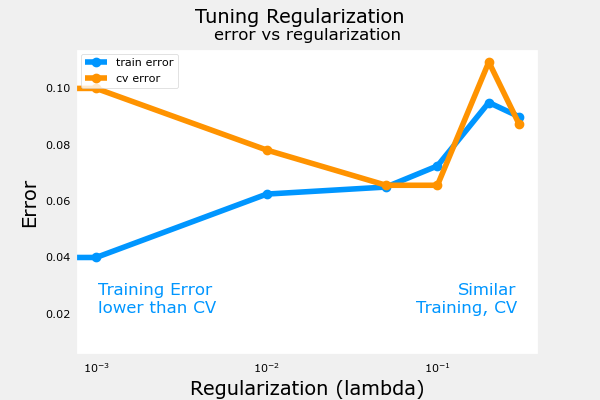

In [64]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


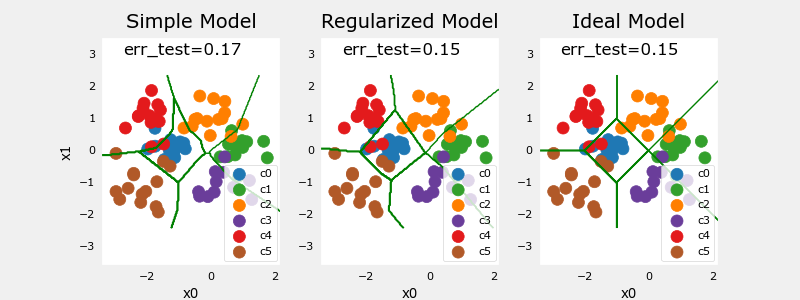

In [65]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)